# Yelp Review Dataset - Initial File Processing

In this notebook, we process the Yelp review dataset to save it as a more convenient file type for later use in the project.
Yelp provides documentation about this dataset at: https://www.yelp.com/dataset/documentation/main

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

The Reviews dataset is a huge JSON file (6.94 GB). To make the file more manageable, we follow a modified version of the code proposed by Eve Law in [this blog post](https://towardsdatascience.com/load-yelp-reviews-or-other-huge-json-files-with-ease-ad804c2f1537) to load the file.

In [2]:
%%time
data_lines = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }

with open("../data/review.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        data_lines.append(chunk)
    
review_df = pd.concat(data_lines, ignore_index=True)

CPU times: user 2min 12s, sys: 18.8 s, total: 2min 31s
Wall time: 2min 42s


In [3]:
review_df.shape

(8635403, 9)

In [4]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


We examine the column data types below.

In [5]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635403 entries, 0 to 8635402
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        float16       
 4   useful       int32         
 5   funny        int32         
 6   cool         int32         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), float16(1), int32(3), object(4)
memory usage: 444.7+ MB


Aside from the `review_id`, `user_id`, and `business_id` columns, we have 4 numeric columns, 1 date time column, and 1 string type column. The `text` column is the review text submitted for each review entry, hence it cannot be considered a categorical column.

We now take a look at the date distribution of this dataset.

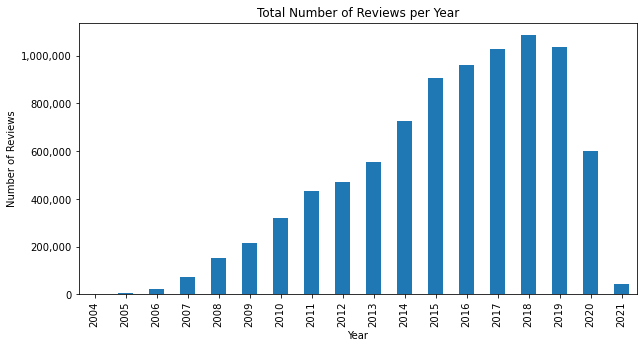

In [18]:
plt.figure(figsize=(10,5))
ax = review_df['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Total Number of Reviews per Year')
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

We can see from this plot that the number of reviews increased over since 2004 all the way to 2018, with only a small drop to 2019 before a significant drop in 2020 probably due to the lockdowns enforced around the world due to the COVID-19 pandemic.

We will export a CSV file with the reviews ranging from 2015 to 2019, which should make our file size more manageable in later analysis.

In [27]:
%%time
review_df[review_df['date'].between('2015-01-01','2019-12-31')].to_csv('../data/review_2015-2019.csv', index=False)

CPU times: user 1min 27s, sys: 5.21 s, total: 1min 32s
Wall time: 1min 38s
